In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [2]:
clean_data = pd.read_csv(r"C:\Users\johnk\ml-project-unsupervised-learning\clean_data.csv")
clean_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [3]:
X=clean_data.iloc[::].values
print(X.shape)
X

(440, 6)


array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

In [4]:
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

Text(0, 0.5, 'Euclidean distance')

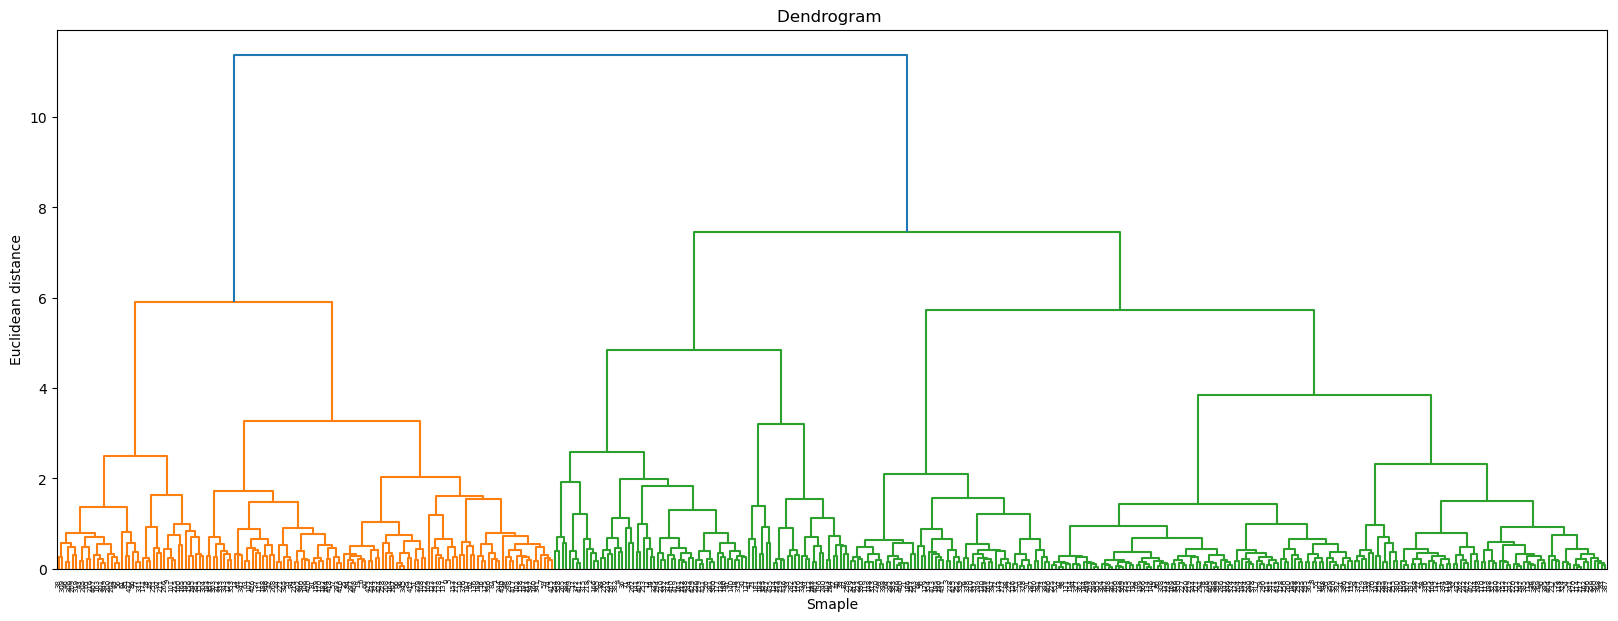

In [6]:
import scipy.cluster.hierarchy as sc

#plot dendrogram

plt.figure(figsize=(20,7))
plt.title("Dendrogram ")

#create dendrogram
sc.dendrogram(sc.linkage(X_scaled,method='ward'))
plt.title("Dendrogram ")
plt.xlabel('Smaple')
plt.ylabel("Euclidean distance")

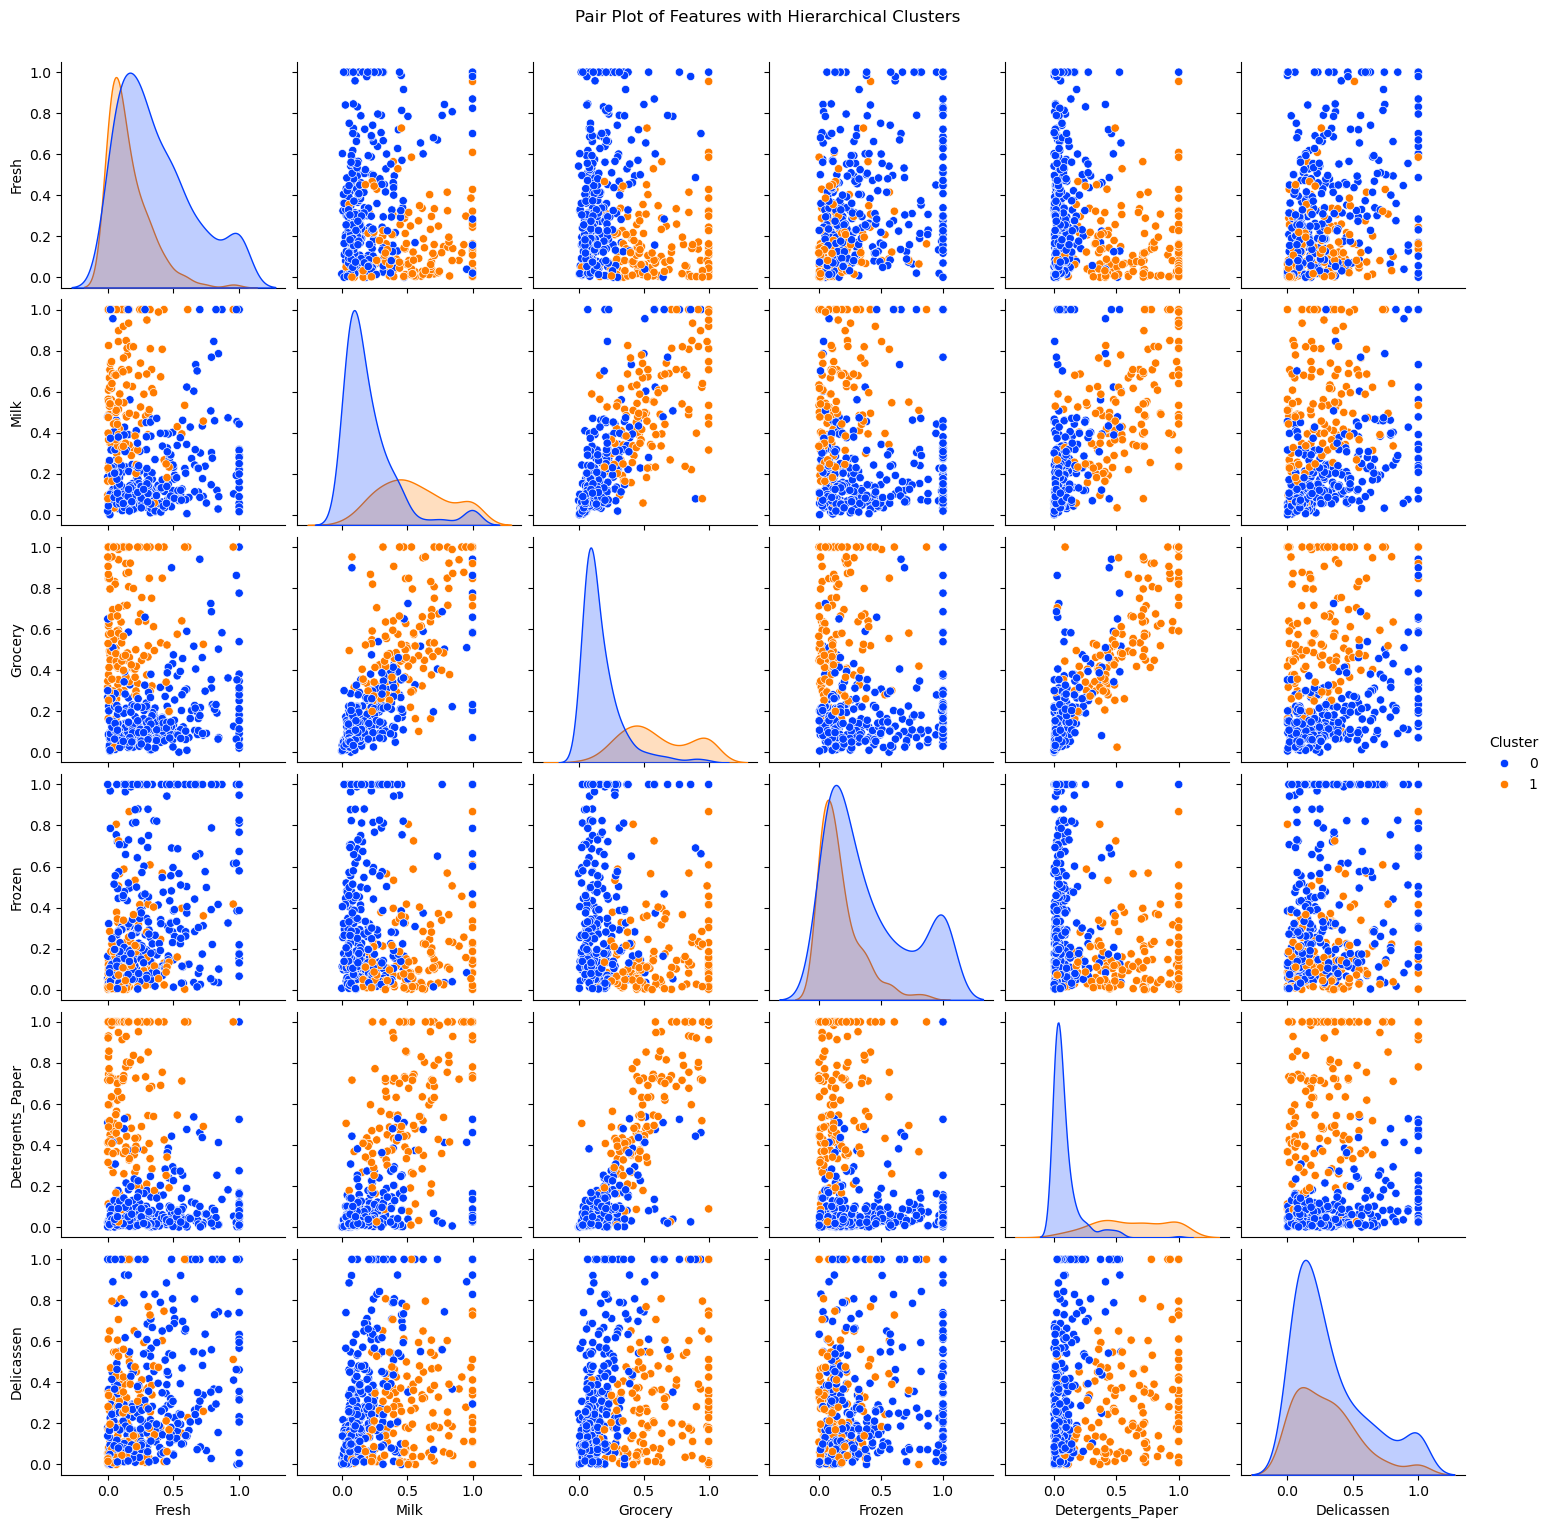

In [12]:


# Assuming X_scaled is your scaled feature data
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Adjust the number of clusters as needed
y_agg_clusters = agg_clustering.fit_predict(X_scaled)

features = clean_data.columns
df = pd.DataFrame(X_scaled, columns=features)

df['Cluster'] = y_agg_clusters

# Note: AgglomerativeClustering does not have cluster centers like K-means
# So we will not create centroids_df_scaled

sns.pairplot(df, hue='Cluster', palette='bright', markers=['o']*agg_clustering.n_clusters)

plt.suptitle('Pair Plot of Features with Hierarchical Clusters', y=1.02)
plt.show()